In [ ]:
#Mounting to you own Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

%cd '/gdrive/MyDrive/Individual assignment machine learning'

Mounted at /gdrive
/gdrive/MyDrive/Individual assignment machine learning


In [ ]:
!pip install missingno
!pip install pandas-profiling
!pip install empiricaldist
!pip install factor-analyzer

  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=1c271dad3088170f02451b4cccdf9a81fa24a5fe4d7908aa07e1fb66019f7d02
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist
     |████████████████████████████████| 41 kB 412 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=13b6d4d52d9f37e22ebacfbb7bbe0eb5346ac5d7bd439a28790556581ec93f7d
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


## Loading packages required for machine learning 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', 1000)

## Exploratory Data anaylsis 


In [ ]:
covid_data = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [ ]:
covid_head = covid_data.head(5)
covid_tail = covid_data.tail(5)

#checking for the first five records in the dataset 
covid_head

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#checking for the last five records in the dataset
covid_tail

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
covid_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    PATIENT_VISIT_IDENTIFIER          int64  
 1    AGE_ABOVE65                       int64  
 2    AGE_PERCENTIL                     object 
 3    GENDER                            int64  
 4    DISEASE GROUPING 1                float64
 5    DISEASE GROUPING 2                float64
 6    DISEASE GROUPING 3                float64
 7    DISEASE GROUPING 4                float64
 8    DISEASE GROUPING 5                float64
 9    DISEASE GROUPING 6                float64
 10   HTN                               float64
 11   IMMUNOCOMPROMISED                 float64
 12   OTHER                             float64
 13   ALBUMIN_MEDIAN                    float64
 14   ALBUMIN_MEAN                      float64
 15   ALBUMIN_MIN                       float64
 16   ALBUMIN_MAX           

In [ ]:
print("The shape of the dataset (Rows, Columns) is:",covid_data.shape)

The shape of the dataset (Rows, Columns) is: (1925, 231)


In [ ]:
covid_data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

Observations:
There are 231 columns and 1925 records in this dataset. with the majority of the data being continous data. There isn't any duplicate data. What I have noticed is that there is alot of columns that have similar names such as BP_ARTERIAL_DIFF BP_ARTERIAL_MIN BP_ARTERIAL_MAX and so on. Would it be possible to remove some of these features. I think the mean would be appropiate, not only I can impute the mean using sklearn's imputer but it's because the data wa taken over five days as each patient identifier is repeated 5 times. 

###### Unique values in each column 

In [ ]:
import pprint #Makes the unique_data dictionary look more presentable 
unique_data = {} #Empty dictionary that stores column names and the number of uniques values in them (column:unique values) 

for column in covid_data.columns:        #
  num = len(covid_data[column].unique()) #For loop that counts the number of unique valus in each column and inserts the key:value pair in the unique_data dictionary
  unique_data[column] = num              #


pprint.pprint(unique_data) 
# one question found was a good quesiton,  can we predict this stuff with laboratory tests
#another question (research is required) what links have been found to apply to ICU visits

bin_col = []
for column in unique_data:
  if (unique_data[column] == 2):
    bin_col.append(column)






{'AGE_ABOVE65': 2,
 'AGE_PERCENTIL': 10,
 'ALBUMIN_DIFF': 2,
 'ALBUMIN_MAX': 33,
 'ALBUMIN_MEAN': 33,
 'ALBUMIN_MEDIAN': 33,
 'ALBUMIN_MIN': 33,
 'BE_ARTERIAL_DIFF': 2,
 'BE_ARTERIAL_MAX': 57,
 'BE_ARTERIAL_MEAN': 57,
 'BE_ARTERIAL_MEDIAN': 57,
 'BE_ARTERIAL_MIN': 57,
 'BE_VENOUS_DIFF': 2,
 'BE_VENOUS_MAX': 64,
 'BE_VENOUS_MEAN': 64,
 'BE_VENOUS_MEDIAN': 64,
 'BE_VENOUS_MIN': 64,
 'BIC_ARTERIAL_DIFF': 2,
 'BIC_ARTERIAL_MAX': 27,
 'BIC_ARTERIAL_MEAN': 27,
 'BIC_ARTERIAL_MEDIAN': 27,
 'BIC_ARTERIAL_MIN': 27,
 'BIC_VENOUS_DIFF': 2,
 'BIC_VENOUS_MAX': 27,
 'BIC_VENOUS_MEAN': 27,
 'BIC_VENOUS_MEDIAN': 27,
 'BIC_VENOUS_MIN': 27,
 'BILLIRUBIN_DIFF': 2,
 'BILLIRUBIN_MAX': 96,
 'BILLIRUBIN_MEAN': 96,
 'BILLIRUBIN_MEDIAN': 96,
 'BILLIRUBIN_MIN': 96,
 'BLAST_DIFF': 2,
 'BLAST_MAX': 9,
 'BLAST_MEAN': 9,
 'BLAST_MEDIAN': 9,
 'BLAST_MIN': 9,
 'BLOODPRESSURE_DIASTOLIC_DIFF': 91,
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL': 424,
 'BLOODPRESSURE_DIASTOLIC_MAX': 91,
 'BLOODPRESSURE_DIASTOLIC_MEAN': 543,
 'BLOOD

##### Metadata

In [ ]:
data = []

for feature in covid_data.columns:
  # Defining the role 
  if feature == 'ICU':
    role = 'arget'
  elif feature == 'PATIENT_VISIT_IDENTIFIER':
    role = 'ID'
  else:
    role = 'Input'

    # Initialize preserve to True for all variables except for id
    preserve = True
    if feature == 'PATIENT_VISIT_IDENTIFIER':
        preserve = False

 # Defining the type
    if covid_data[feature].any() in bin_col:
        type = 'binary'
    elif  covid_data[feature].dtype == object:
        type = 'categorical'
    elif covid_data[feature].dtype == float or isinstance(covid_data[feature].dtype, float):
        type = 'real'
    else:
        type = 'integer'

  # Defining the data type 
    dtype = covid_data[feature].dtype

 
  # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'role': role,
        'type': type,
        'preserve': preserve,
        'dtype': dtype,
    }
    data.append(feature_dictionary)
    
meta2 = pd.DataFrame(data, columns=['varname', 'role', 'type', 'preserve', 'dtype',])
meta2.set_index('varname', inplace=True)
meta2


,role,type,preserve,dtype
varname,,,,
AGE_ABOVE65,Input,integer,True,int64
AGE_PERCENTIL,Input,categorical,True,object
GENDER,Input,integer,True,int64
DISEASE GROUPING 1,Input,real,True,float64
DISEASE GROUPING 2,Input,real,True,float64
...,...,...,...,...
HEART_RATE_DIFF_REL,Input,real,True,float64
RESPIRATORY_RATE_DIFF_REL,Input,real,True,float64
TEMPERATURE_DIFF_REL,Input,real,True,float64


#### Data quality


##### Data duplication



In [ ]:
covid_data.shape

(1925, 231)

In [ ]:
covid_data = covid_data.drop_duplicates()
covid_data.shape

(1925, 231)

##### Missing values


In [ ]:
print('NaN values =', covid_data.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in covid_data.columns:
    missings = covid_data[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / covid_data.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 223863

Variable DISEASE GROUPING 1 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 2 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 3 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 4 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 5 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 6 has 5 records (0.26%) with missing values.
Variable HTN has 5 records (0.26%) with missing values.
Variable IMMUNOCOMPROMISED has 5 records (0.26%) with missing values.
Variable OTHER has 5 records (0.26%) with missing values.
Variable ALBUMIN_MEDIAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MEAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MIN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MAX has 1104 records (57.35%) with missing values.
Variable ALBUMIN_DIFF has 1104 records (57.35%) with missing values.
Variable BE_ARTERIAL_MED

Note:

As the code above shows, there is a lot of coulmns with alot of missing values. This data would need to be cleaned however, feature selection will be done first as there are quite a few features that can be deemed as important.

note for me: remember to link the article 

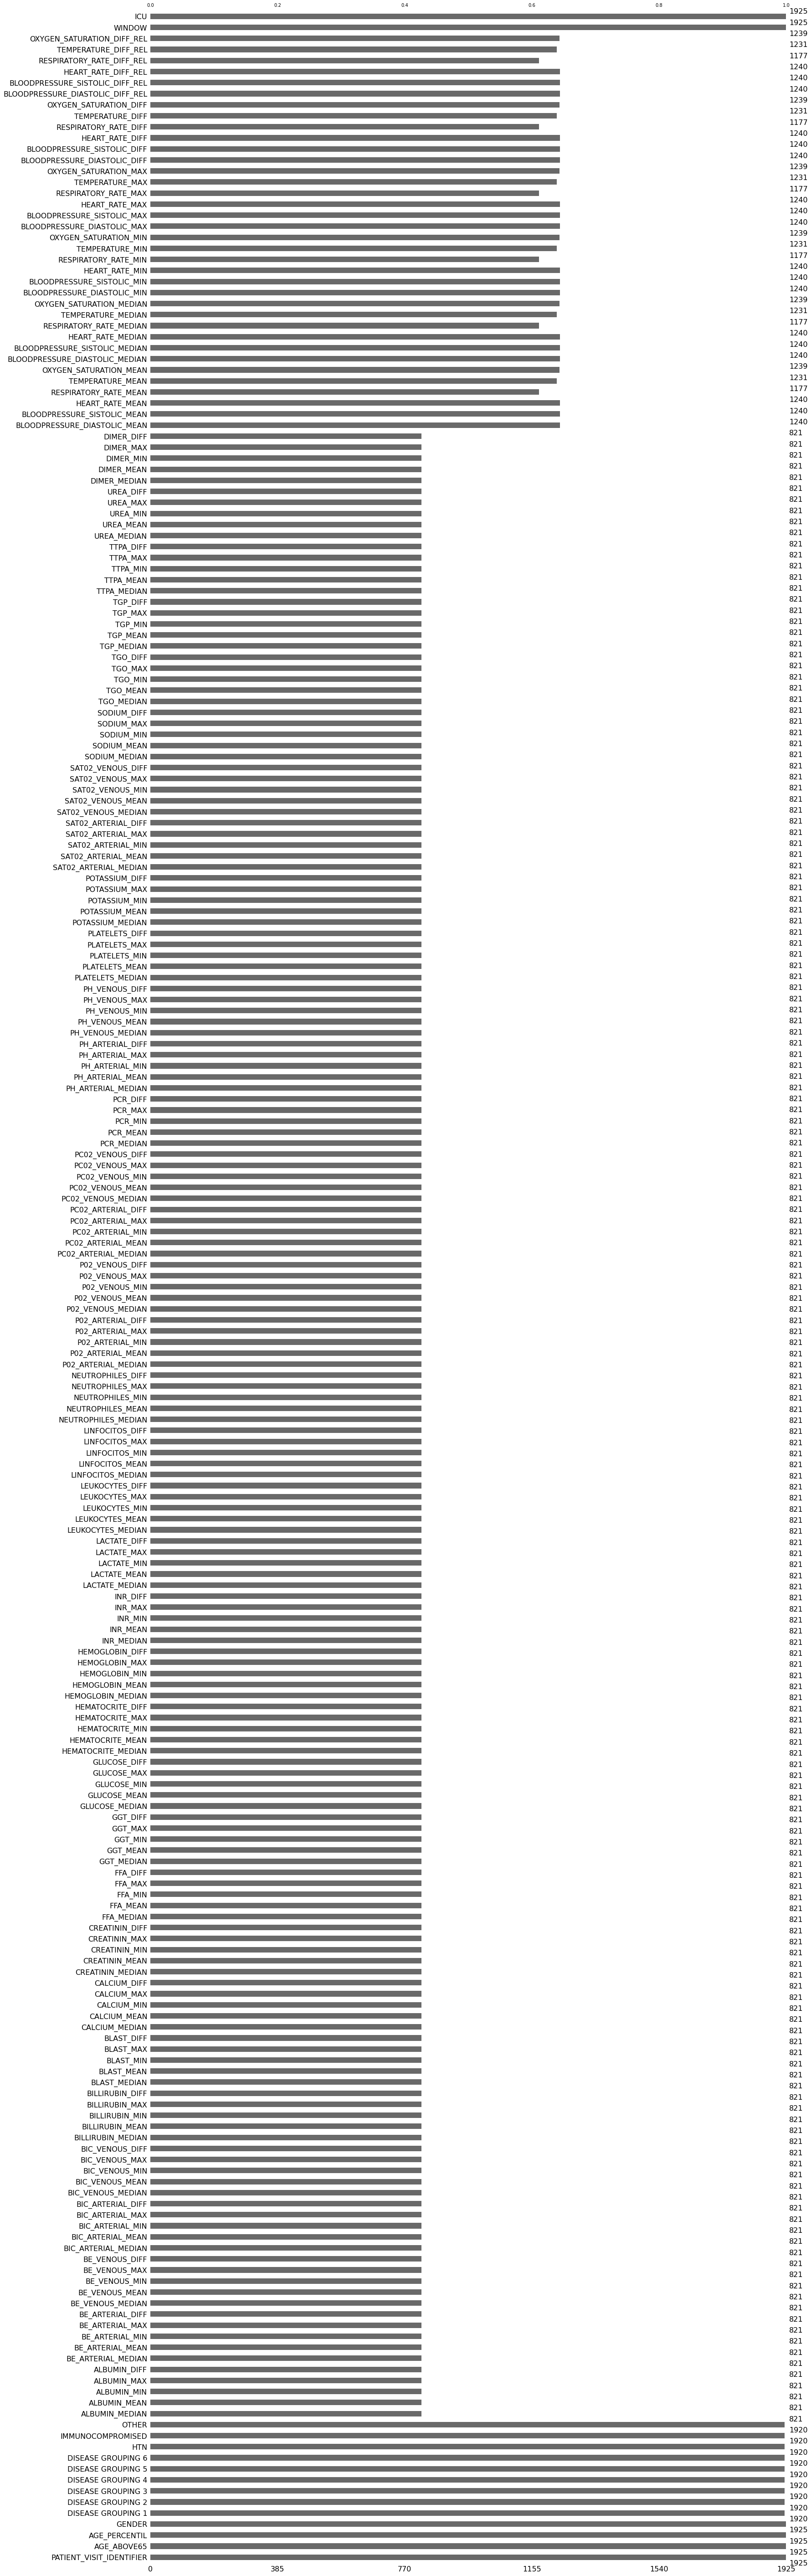

In [ ]:
%matplotlib inline 
msno.bar(covid_data)

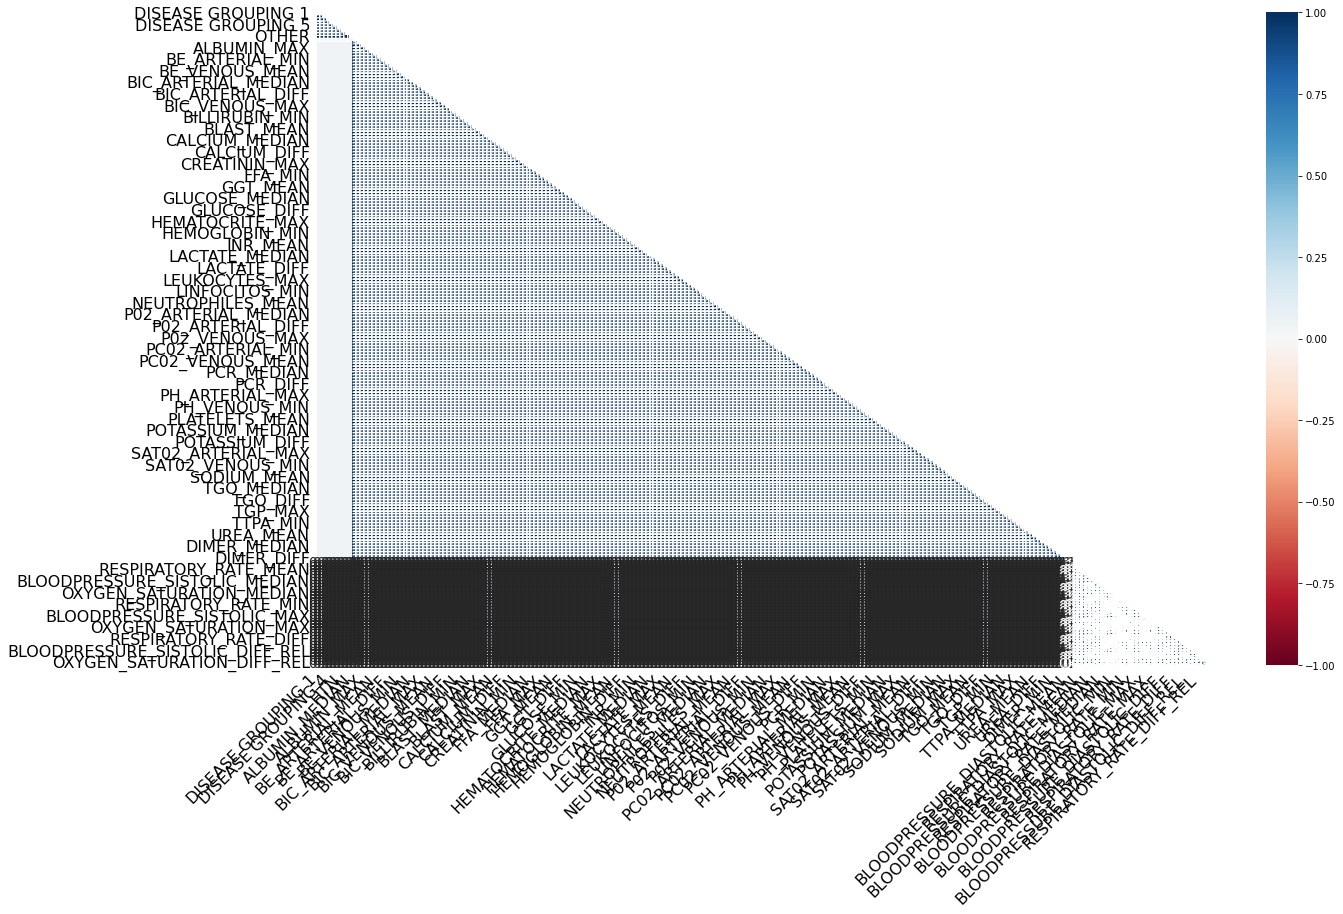

In [ ]:
msno.heatmap(covid_data)

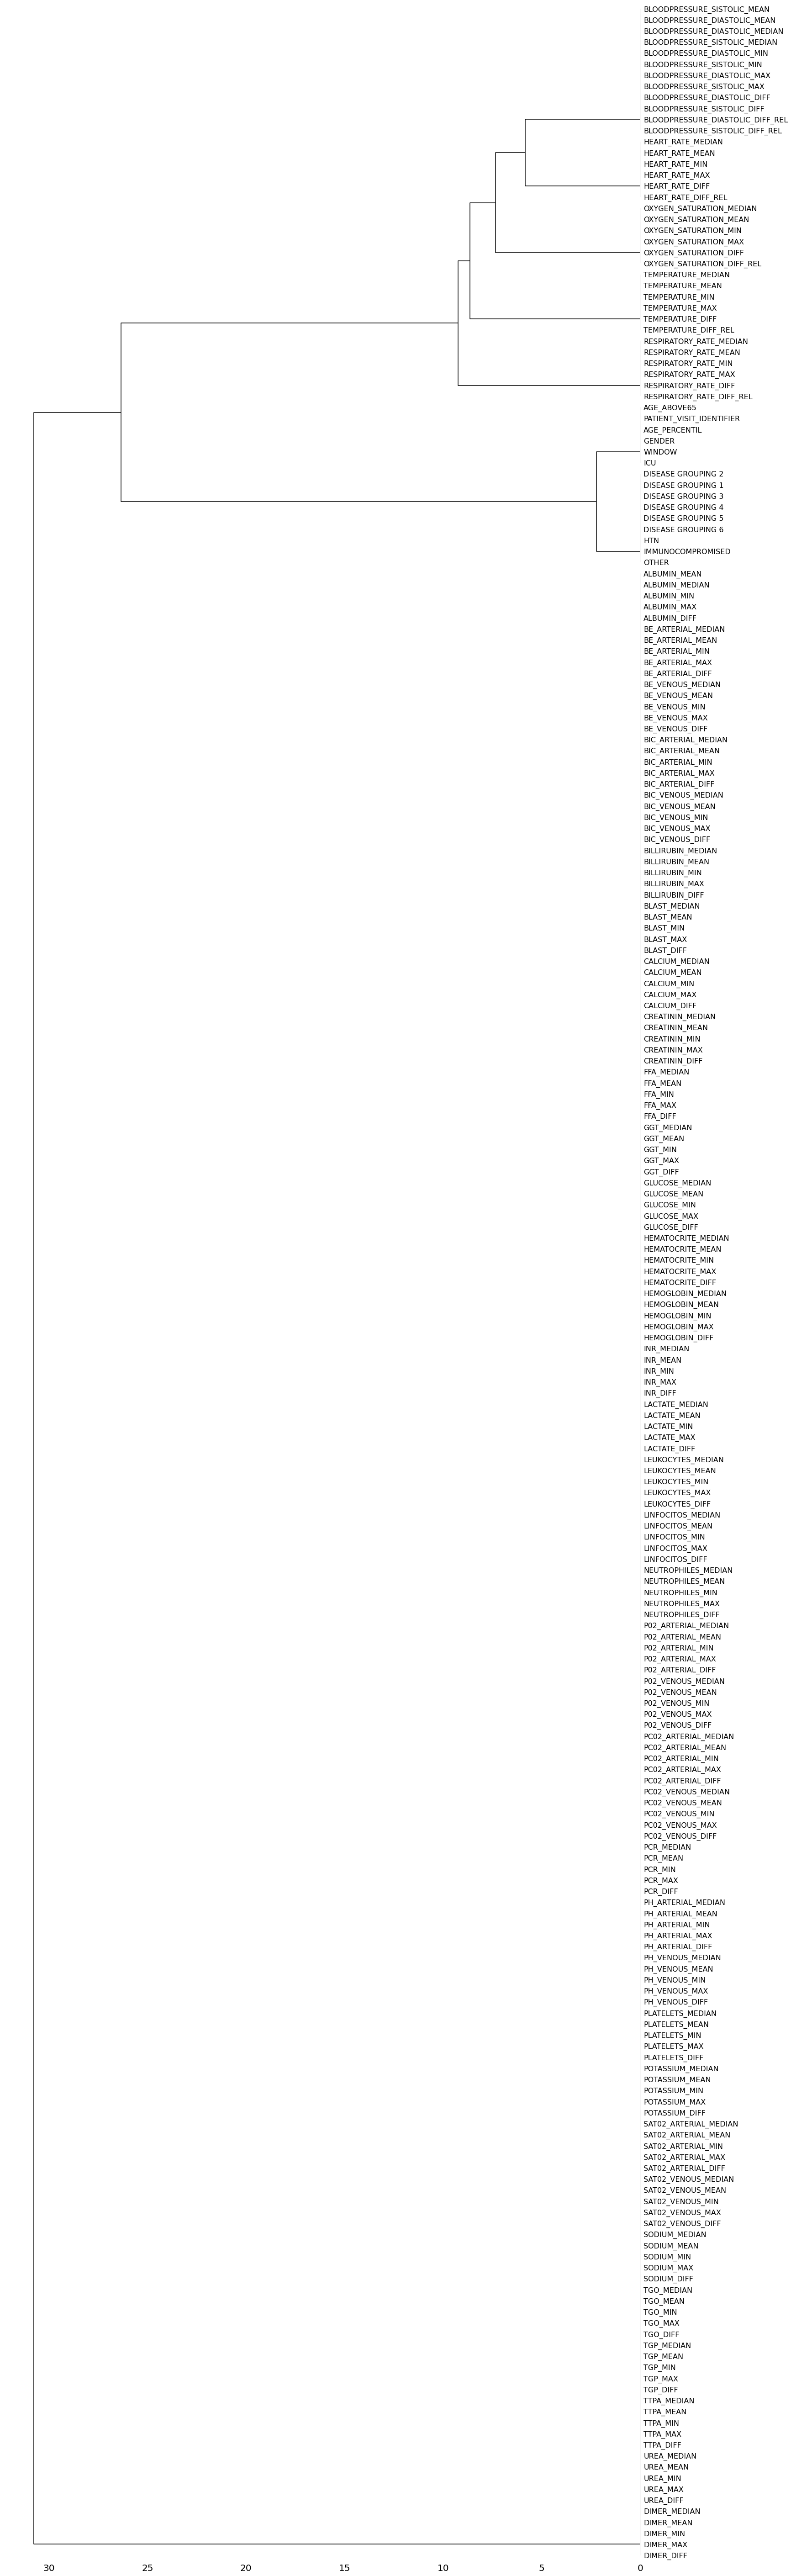

In [ ]:
msno.dendrogram(covid_data)

In [ ]:
covid_data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

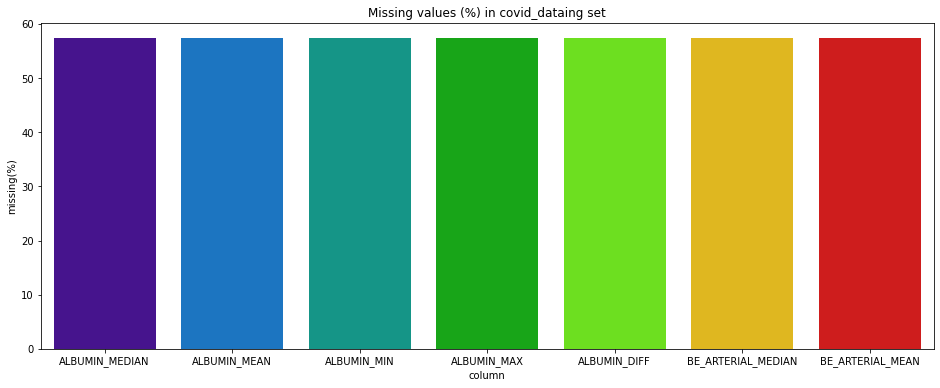

In [ ]:
df_missing_covid_data = pd.DataFrame({'column':covid_data.columns, 'missing(%)':((covid_data.isna()).sum()/covid_data.shape[0])*100})

df_missing_covid_data_nl = df_missing_covid_data.nlargest(7, 'missing(%)')


sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_covid_data_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in covid_dataing set')
plt.show()

Removal of columns with missing values

Observations:

There is quite alot of missing values in alot of the columns.

To rectify this I will impute the missing values using median.

In [ ]:
covid_data_real = [] 
for column in covid_data.columns:
  if covid_data[column].dtype == 'object':
    covid_data_real.append(column)

covid_real = covid_data.drop(labels = covid_data_real, axis = 1)


In [ ]:
covid_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    PATIENT_VISIT_IDENTIFIER          int64  
 1    AGE_ABOVE65                       int64  
 2    AGE_PERCENTIL                     object 
 3    GENDER                            int64  
 4    DISEASE GROUPING 1                float64
 5    DISEASE GROUPING 2                float64
 6    DISEASE GROUPING 3                float64
 7    DISEASE GROUPING 4                float64
 8    DISEASE GROUPING 5                float64
 9    DISEASE GROUPING 6                float64
 10   HTN                               float64
 11   IMMUNOCOMPROMISED                 float64
 12   OTHER                             float64
 13   ALBUMIN_MEDIAN                    float64
 14   ALBUMIN_MEAN                      float64
 15   ALBUMIN_MIN                       float64
 16   ALBUMIN_MAX           

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')




In [ ]:
covid_imputing = covid_data.drop(['PATIENT_VISIT_IDENTIFIER','AGE_PERCENTIL','WINDOW'], axis = 1)

In [ ]:
real_columns = []
for column in covid_imputing.columns:
  real_columns.append(column)


In [ ]:
covid_imputing  = imp.fit_transform(covid_imputing)

In [ ]:
covid_imputing = pd.DataFrame(covid_imputing, columns= real_columns)

In [ ]:
covid_data = pd.merge(covid_data,covid_imputing)

In [ ]:
covid_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,-0.979069,-0.979069,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.326531,0.326531,0.326531,0.326531,-1.0,-0.926398,-0.926398,-0.

In [ ]:
print('NaN values =', covid_data.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in covid_data.columns:
    missings = covid_data[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / covid_data.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 0

In total, there are 0 variables with missing values


### Univariate exploration 

##### Binary Features


<function matplotlib.pyplot.show>

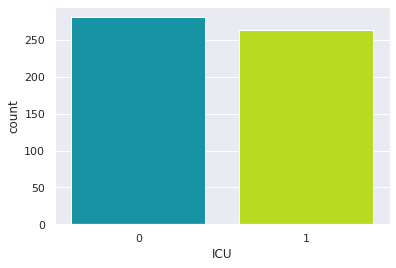

In [ ]:
sns.set_style('white')

sns.set(font_scale=1)

plt.figure()
sns.countplot(x=covid_data['ICU'], palette = 'nipy_spectral')
plt.show

The ICU variable is sligltly imbalanced, the number of 1s are not equal to the number of 0s however this difference is not big.

---



In [ ]:
covid_data['ICU'].describe()

count    545.000000
mean       0.484404
std        0.500216
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ICU, dtype: float64

In [ ]:
bin_col

['AGE_ABOVE65',
 'GENDER',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_DIFF',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_DIFF',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_DIFF',
 'PLATELETS_DIFF',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_DIFF',
 'SODIUM_DIFF',
 'TGO_DIFF',
 'TGP_DIFF',
 'TTPA_DIFF',
 'UREA_DIFF',
 'DIMER_DIFF',
 'ICU']

In [ ]:

for column in covid_data.columns:        #
  num = len(covid_data[column].unique()) #For loop that counts the number of unique valus in each column and inserts the key:value pair in the unique_data dictionary
  unique_data[column] = num  

bin_col = []
for column in unique_data:
  if (unique_data[column] == 2):
    bin_col.append(column)

<Figure size 432x288 with 0 Axes>

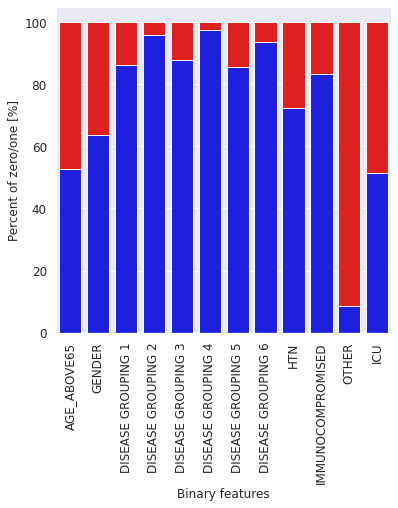

In [ ]:

zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((covid_data[col]==0).sum()/covid_data.shape[0]*100)
    one_list.append((covid_data[col]==1).sum()/covid_data.shape[0]*100)
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
# Bar plot
p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom= zero_list, color="red")
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.savefig('Binary features graph.png')
plt.show();

Observation: all binary values except for ICU are imbalanced. Huge imbalancing in the, OTHER, DISEASE GROUPINGS, htn and IMMUNOCOMPRIMISED features. Overfitting or underfitting is required to solve this issue

##### Interval (real) numbers


In [ ]:
def corr_heatmap(sample, masking=False):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    if masking==False:
        correlations = sample.corr()
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', 
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    else:
        correlations = np.triu(sample.corr())
        sns.heatmap(sample.corr(), cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75}, 
                    mask=correlations)
    plt.show();    

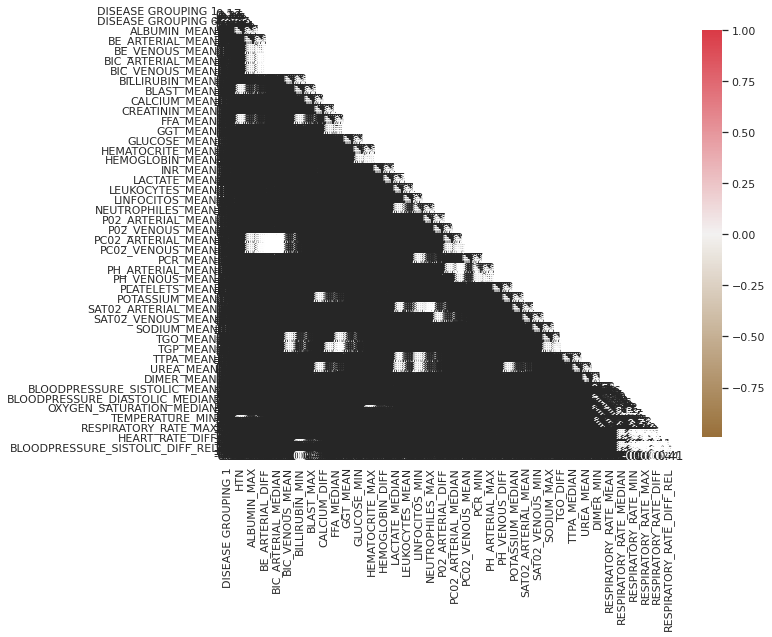

In [ ]:
sample = covid_data.sample(100)
var = meta2[(meta2.type == 'real') & (meta2.preserve)].index
sample = sample[var]
corr_heatmap(sample, masking=True)

No observations can be made from this graph as it is incomprehensible due to how many columns there are. A further data analysis will have to be done after the numbers of columns are reduced.

In [ ]:
sample.corr()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,1.000000,0.171903,0.201013,-0.101936,0.186035,-0.012748,0.352694,0.036007,0.110694,-0.045370,-0.045370,-0.045370,-0.045370,NaN,-0.092784,-0.092784,-0.092784,-0.092784,NaN,0.015940,0.015940,0.015940,0.015940,NaN,-0.154153,-0.154153,-0.154153,-0.154153,NaN,-0.092257,-0.092257,-0.092257,-0.092257,NaN,0.180677,0.180677,0.180677,0.180677,NaN,-0.040551,-0.040551,-0.040551,-0.040551,NaN,-0.161197,-0.161197,-0.161197,-0.161197,NaN,0.018153,0.018153,0.018153,

# Data Preparation 

#### Feature Selection

Performing feature selection using random forest classifier as the K-best will not accept negative values.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_covid_data = covid_data.drop(['PATIENT_VISIT_IDENTIFIER', 'ICU','WINDOW','AGE_PERCENTIL'], axis=1)
y_covid_data = covid_data['ICU']




In [ ]:
print(X_covid_data.shape)
pca = PCA(n_components=2)

reduced = pca.fit_transform(X_covid_data)
print(reduced.shape)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


(545, 227)
(545, 2)


In [ ]:
import plotly.express as px


In [ ]:
fig = px.scatter_matrix(
    reduced,
    labels=labels,
    dimensions=range(2))
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
X_covid_data = covid_data.drop(['PATIENT_VISIT_IDENTIFIER', 'ICU','WINDOW','AGE_PERCENTIL'], axis=1)
y_covid_data = covid_data['ICU']

feat_labels = X_covid_data.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_covid_data, y_covid_data)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_covid_data.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) RESPIRATORY_RATE_MEAN          0.067986
 2) RESPIRATORY_RATE_MAX           0.065738
 3) RESPIRATORY_RATE_DIFF_REL      0.065436
 4) RESPIRATORY_RATE_DIFF          0.059675
 5) RESPIRATORY_RATE_MEDIAN        0.036705
 6) BLOODPRESSURE_DIASTOLIC_MIN    0.036481
 7) RESPIRATORY_RATE_MIN           0.030623
 8) LACTATE_MEDIAN                 0.019459
 9) BLOODPRESSURE_SISTOLIC_MAX     0.017354
10) LACTATE_MAX                    0.017258
11) LACTATE_MIN                    0.017120
12) BLOODPRESSURE_SISTOLIC_DIFF    0.016519
13) LACTATE_MEAN                   0.015008
14) BLOODPRESSURE_SISTOLIC_DIFF_REL 0.014675
15) BLOODPRESSURE_DIASTOLIC_DIFF_REL 0.008703
16) BLOODPRESSURE_DIASTOLIC_DIFF   0.008259
17) BE_VENOUS_MEAN                 0.008145
18) P02_VENOUS_MEAN                0.007937
19) BE_VENOUS_MAX                  0.007911
20) P02_VENOUS_MAX                 0.007387
21) BLOODPRESSURE_DIASTOLIC_MEAN   0.007349
22) SAT02_VENOUS_MAX               0.006984
23) P02_VENOUS_MEDIAN        

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_covid_data.shape[1]))
n_features = sfm.transform(X_covid_data).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 227
Number of features after selection: 114


In [ ]:
covid_data = covid_data[selected_vars + ['ICU','AGE_PERCENTIL']]

In [ ]:
covid_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 116 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   BE_VENOUS_MEDIAN                  float64
 1   BE_VENOUS_MEAN                    float64
 2   BE_VENOUS_MIN                     float64
 3   BE_VENOUS_MAX                     float64
 4   BIC_VENOUS_MEAN                   float64
 5   CALCIUM_MEDIAN                    float64
 6   CALCIUM_MEAN                      float64
 7   CALCIUM_MIN                       float64
 8   CALCIUM_MAX                       float64
 9   CREATININ_MEAN                    float64
 10  CREATININ_MIN                     float64
 11  CREATININ_MAX                     float64
 12  HEMATOCRITE_MEDIAN                float64
 13  HEMATOCRITE_MEAN                  float64
 14  HEMATOCRITE_MIN                   float64
 15  HEMATOCRITE_MAX                   float64
 16  HEMOGLOBIN_MEDIAN                 float64
 

In [ ]:
print('Before dummification we have {} variables in train'.format(covid_data.shape[1]))
covid_data = pd.get_dummies(covid_data, columns=['AGE_PERCENTIL'], drop_first=True)
print('After dummification we have {} variables in train'.format(covid_data.shape[1]))
covid_data

Before dummification we have 116 variables in train
After dummification we have 124 variables in train


,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_VENOUS_MEAN,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TTPA_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,-0.863874,-0.863874,-0.863874,-0.863874,-0.414634,0.326531,0.326531,0.326531,0.326531,-0.926398,-0.926398,-0.926398,-0.320755,-0.320755,-0.320755,-0.320755,-0.353659,-0.353659,-0.353659,-0.353659,-0.963023,-0.963023,-0.963023,-0.963023,-0.762843,-0.762843,-0.762843,-0.762843,-0.643154,-0.643154,-0.643154,-0.643154,-0.868747,-0.868747,-0.868747,-0.868747,-0.230769,-0.230769,-0.230769,-0.230769,-0.815951,-1.000000,-1.000000,-1.000000,-1.000000,0.393939,0.393939,0.393939,0.393939,-0.471295,-0.471295,-0.471295,-0.471295,-0.666667,-0.666667,-0.666667,-0.666667,0.925926,0.925926,0.925926,0.925926,0.142857,-0.999067,-0.999067,-0.999067,-0.999067,-0.983994,-0.983994,-0.983994,-0.846633,-0.836145,-0.836145,-0.836145,-0.836145,-0.996762,-0.996762,-0.996762,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,1,0,0,0,0,1,0,0,0,0
1,-1.000000,-1.000000,-1.000000,-1.000000,-0.219512,0.530612,0.530612,0.530612,0.530612,-0.615004,-0.615004,-0.615004,-0.870021,-0.870021,-0.870021,-0.870021,-0.914634,-0.914634,-0.914634,-0.914634,-1.000000,-1.000000,-1.000000,-1.000000,-0.523754,-0.523754,-0.523754,-0.523754,-0.858921,-0.858921,-0.858921,-0.858921,-0.557023,-0.557023,-0.557023,-0.557023,1.000000,1.000000,1.000000,1.000000,-0.496933,-0.834405,-0.834405,-0.834405,-0.834405,-0.060606,-0.060606,-0.060606,-0.060606,-0.636849,-0.636849,-0.636849,-0.636849,-0.629630,-0.629630,-0.629630,-0.629630,1.000000,1.000000,1.000000,1.000000,-0.257143,-0.997014,-0.997014,-0.997014,-0.997014,-0.993902,-0.993902,-0.993902,-0.846633,-0.561446,-0.561446,-0.561446,-0.561446,-0.978029,-0.978029,-0.978029

# Machine Learning Model

In [ ]:
pip install fast_ml

In [1]:
#Splitting the data into training and testing data 
from fast_ml.model_development import train_valid_test_split
X_train, y_train , X_test, y_test, X_valid, y_valid = train_valid_test_split(covid_data,target ='ICU',train_size = 0.8, valid_size = 0.1, test_size=0.1)



ModuleNotFoundError: No module named 'fast_ml'

In [2]:
#Loading in models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


C:\Users\smart\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\smart\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\smart\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\smart\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be remove

In [ ]:
classifiers = {"Linear SVM":SVC(kernel="linear", C = 0.025),
               "RBFSVM":SVC(gamma=2, C=1),
        "DecisionTree":DecisionTreeClassifier(),
        "Logistic Regression":LogisticRegression(), 
        "XGBoost":XGBClassifier(verbosity=0), 
        "LightGBM":LGBMClassifier()}

In [ ]:
def model_fit(classifiers):
    fitted_model={}
    model_result = pd.DataFrame()
    for model_name, model in classifiers.items():
        model.fit(X_train,y_train)
        fitted_model.update({model_name:model})
        #y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Accuracy'] = accuracy_score(y_test, model.predict(X_test))
        model_dict['3. Precision'] = precision_score(y_test, model.predict(X_test))
        model_dict['4.Recall'] = recall_score(y_test, model.predict(X_test))
        model_dict['5.AUROC'] = roc_auc_score(y_test, model.predict(X_test))
        model_result = model_result.append(model_dict,ignore_index=True)
    return fitted_model, model_result

In [ ]:
fitted_model, model_result = model_fit(classifiers)

model_result.sort_values(by=['2.Accuracy'],ascending=True)

,1.Algorithm,2.Accuracy,3. Precision,4.Recall,5.AUROC
1,RBFSVM,0.759259,0.657895,1.00,0.775862
2,DecisionTree,0.796296,0.769231,0.80,0.796552
5,LightGBM,0.851852,0.814815,0.88,0.853793
3,Logistic Regression,0.870370,0.846154,0.88,0.871034
0,Linear SVM,0.888889,0.880000,0.88,0.888276
4,XGBoost,0.888889,0.851852,0.92,0.891034


Observatons:
* After running 6 models on the dataset, the RBFSVM is the worse model out of the 6. Despite it's high recall it has the lowest ROC-AUC score, precision and accuracy. 

The top three models to be selected for hyper tuning are the following:

* Linear SVM 
* LightGBM  
* Logistic regression

# Hyperparameter Tuning 





In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

### Tuning Logistic Regression 

In [ ]:
#define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression()
#Search Space Dictionary
space = dict()
space['penalty'] = ['l1','elasticnet','none']
space['C'] = [0.25,0.5,0.75]

#defining grid search
search = RandomizedSearchCV(model, space, scoring = 'accuracy', n_jobs=1, cv=cv)

In [ ]:
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8495066948555323
Best Hyperparameters: {'penalty': 'none', 'C': 0.25}


### Tuning linear SVM 


In [ ]:
#define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = SVC(kernel="linear", C = 0.025)
#Search Space Dictionary
space = dict()
space['gamma'] = [0.0005,0.005,0.05]


#defining grid search
search = RandomizedSearchCV(model, space, scoring = 'accuracy', n_jobs=1, cv=cv)

In [ ]:
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8188336856941508
Best Hyperparameters: {'gamma': 0.0005}


### Tuning LightGBM

In [ ]:
#define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LGBMClassifier()
#Search Space Dictionary
space = dict()
space['boosting_type'] = ['gbdt','goss','dart']
space['max_depth'] = [2,4,6,8,10,12]
space['learning_rate'] = [0.0005,0.005,0.05]
space['num_leaves'] = [10,20,30,40,50,60,70,80,90]
#defining grid search
search = RandomizedSearchCV(model, space, scoring = 'accuracy', n_jobs=1, cv=cv)

In [ ]:
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8775722339675828
Best Hyperparameters: {'num_leaves': 40, 'max_depth': 2, 'learning_rate': 0.05, 'boosting_type': 'goss'}


### Using the Valdation set to test the tuned models 



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

log_reg = LogisticRegression(penalty = 'none', C= 0.25)

log_reg.fit(X_train,y_train)

predicted = log_reg.predict(X_valid)

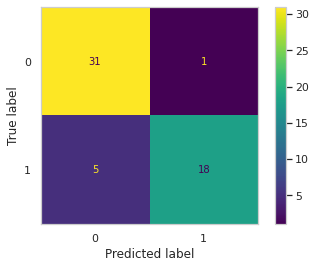

In [ ]:
plot_confusion_matrix(log_reg, X_valid, y_valid)
plt.grid(False)
#plt.savefig('Logistic regression matrix.png')
plt.show()

In [ ]:
print("The Accuracy of this model is:", accuracy_score(y_valid, predicted))

print("The presion of this model is:", precision_score(y_valid, predicted))

print("The recall of this model is:", recall_score(y_valid, predicted))

print("The Area under the curve is:", roc_auc_score(y_valid, predicted))

The Accuracy of this model is: 0.8909090909090909
The presion of this model is: 0.9473684210526315
The recall of this model is: 0.782608695652174
The Area under the curve is: 0.8756793478260869


In [ ]:
support_vec_machine= SVC(kernel="linear", C = 0.025, gamma = 0.0005)
support_vec_machine.fit(X_train,y_train)
predicted = support_vec_machine.predict(X_valid)

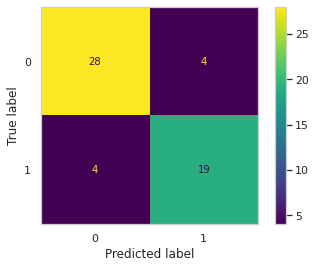

In [ ]:
plot_confusion_matrix(support_vec_machine, X_valid, y_valid)
plt.grid(False)
#plt.savefig('SVM matrix.png')
plt.show()

In [ ]:
print("The Accuracy of this model is:", accuracy_score(y_valid, predicted))

print("The presion of this model is:", precision_score(y_valid, predicted))

print("The recall of this model is:", recall_score(y_valid, predicted))

print("The Area under the curve is:", roc_auc_score(y_valid, predicted))

The Accuracy of this model is: 0.8545454545454545
The presion of this model is: 0.8260869565217391
The recall of this model is: 0.8260869565217391
The Area under the curve is: 0.8505434782608696


In [ ]:
LGBM_model = LGBMClassifier(num_leaves = 40, max_depth = 2, learning_rate = 0.05, boosting_type =  'goss')
LGBM_model.fit(X_train,y_train)
predicted = LGBM_model.predict(X_valid)

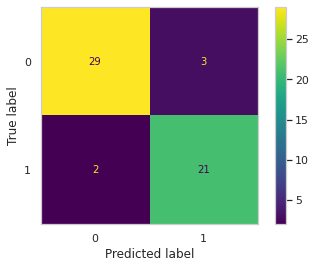

In [ ]:
plot_confusion_matrix(LGBM_model, X_valid, y_valid)
plt.grid(False)
#plt.savefig('lightgbm matrix.png')
plt.show()

In [ ]:
print("The Accuracy of this model is:", accuracy_score(y_valid, predicted))

print("The presion of this model is:", precision_score(y_valid, predicted))

print("The recall of this model is:", recall_score(y_valid, predicted))

print("The Area under the curve is:", roc_auc_score(y_valid, predicted))

The Accuracy of this model is: 0.8909090909090909
The presion of this model is: 0.8695652173913043
The recall of this model is: 0.8695652173913043
The Area under the curve is: 0.8879076086956521


Observations:

After the hyperparameter tuning, LightGBM is the  best model to use on this data set. This is shown from it's higher accuracy, precision, recall and ROC-AUC than the two alernative models, SVM and Logistic regression